In [48]:
#fake news detection
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
#reading data

data = pd.read_csv('fake_or_real_news.csv', delimiter = ',')

In [50]:
#printing the head

print(data.head())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [51]:
#getting label column in a separate variable

labels = data.label
print(labels.head())

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object


In [27]:
#getting counts of label i.e. real or fake

target = data.label.value_counts()
print(target)
target = pd.DataFrame(target)

REAL    3171
FAKE    3164
Name: label, dtype: int64


In [43]:
# creating the dataset
data = {'REAL':3171, 'FAKE':3164}
labels = list(data.keys())
values = list(data.values())

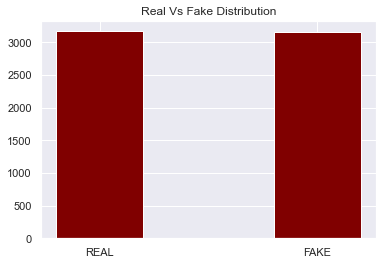

In [44]:
plt.bar(labels, values, color ='maroon',
        width = 0.4)
plt.title("Real Vs Fake Distribution")
plt.show()

In [13]:
#splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data['text'], labels, test_size=0.2, 
                                                random_state=1)

In [14]:
#importing the tfidf vectorizer - transforms the freq of words into number
#building the vectorizer upon the dataset

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
train = tfidf.fit_transform(xtrain)
test = tfidf.transform(xtest)

In [16]:
#importing the passive aggressive classifier - online learning algorithm 
#which trains a system incrementally by feeding in the data sequentially

#training the classifier on the training data

from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(train, ytrain)

#predicting the label of test set

ypred = pac.predict(test)

#checking the accuracy of the built model

from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy Score of Passive Aggresive Scassifier: {round(accuracy*100,2)}%')

Accuracy Score of Passive Aggresive Scassifier: 94.48%


In [17]:
#printing the confusion matrix
print(confusion_matrix(ytest, ypred, labels=["FAKE", "REAL"]))

[[615  36]
 [ 34 582]]
